###  Using the follwing to lunch gateway
https://interactivebrokers.github.io/cpwebapi/quickstart

1. cd clientportal.gw 
1. bin/run.sh root/conf.yaml
1. https://localhost:5000 
1. https://localhost:5000/demo#/
1. https://www.interactivebrokers.com/api/doc.html
1. https://localhost:5000/v1/api/iserver/contract/270639/info


Robinhood Python API https://robin-stocks.readthedocs.io/en/latest/

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader
import datetime as dt
import robin_stocks.robinhood as robin

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
# Set notebook mode to work in offline
import plotly.offline as pyo
pyo.init_notebook_mode()


from IPython.display import display, HTML
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:,.2f}'.format
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

import import_ipynb
import portfolio_robinhood as robinhood
import portfolio_ibkr as ibkr

from general_functions import *

importing Jupyter notebook from portfolio_robinhood.ipynb
importing Jupyter notebook from general_functions.ipynb
importing Jupyter notebook from portfolio_ibkr.ipynb


In [2]:
ibkr_csv_file_name='csv_from_interactive_broker'
ibkr_account_number = 'interactive_broker_account_number'
robinhood_user_name = 'robinhood_user_name'
robinhodd_pass_Word = 'robinhood_password'

# 1. Robinhood Analytics Standalone  

In [10]:
%%time
dict_my_portfolio_robinhood  = robinhood.my_portfolio(robinhood_user_name,robinhodd_pass_Word)
dict_trade_histroy_robinhood = robinhood.trade_histroy(robinhood_user_name,robinhodd_pass_Word)

400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=RSXJ
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=RSXJ
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=RSX
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=RSX
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=OGZPY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=OGZPY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=SBRCY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=SBRCY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=SGTPY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=SGTPY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=MBT
400 Client Erro


1 Failed download:
['USD=X']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1690151857. Only 100 years worth of day granularity data are allowed to be fetched per request.')



Number of symbosl to search on yahoo 115
115 quote from Yfinance
retrieved attributes form yahoo finance
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
getting current prices
Portfolio Data Retrival Compeleted
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Loading page 19 ...
Trade histroy retrieval completed
CPU times: user 17.4 s, sys: 1.05 s, total: 18.4 s

In [ ]:
portfolio_analytics(dict_my_portfolio_robinhood,dict_trade_histroy_robinhood,height=500,width=1400)

# 2.  Interactive Broker Analytics Standalone  

In [9]:
dict_my_portfolio_ibkr  = ibkr.my_portfolio(ibkr_csv_file_name,ibkr_account_number)
dict_trade_histroy_ibkr = ibkr.trade_histroy(ibkr_csv_file_name,ibkr_account_number)

In [42]:
portfolio_analytics(dict_my_portfolio_ibkr,dict_trade_histroy_ibkr,height=500,width=1400)

# 3. Interactive Broker + Robinhood Analytics 

In [56]:
# %run general_functions.ipynb
conolidated_res = portfolio_consolidator(dict_my_portfolio_robinhood,
                                          dict_trade_histroy_robinhood,
                                         dict_my_portfolio_ibkr,
                                         dict_trade_histroy_ibkr)

dict_my_portfolio = conolidated_res['dict_my_portfolio']
dict_trade_histroy = conolidated_res['dict_trade_histroy']

begins_at  close_market_value  adjusted_close_equity  PnL  CumPnL  \
1818 2023-07-15                0.99                   0.93 0.43    0.89   
1819 2023-07-16                0.99                   0.93 0.43    0.89   
1820 2023-07-17                0.99                   0.94 0.46    0.90   
1821 2023-07-18                1.00                   0.97 0.61    0.95   
1822 2023-07-19                1.00                   1.00 0.63    1.00   
1823 2023-07-20                0.99                   0.98 0.28    0.96   
1824 2023-07-21                0.68                   0.00 0.37    0.95   

      Return  CumReturn  
1818    0.90       0.93  
1819    0.90       0.93  
1820    0.90       0.94  
1821    0.93       0.97  
1822    0.93       1.00  
1823    0.88       0.98  
1824    0.00       0.00

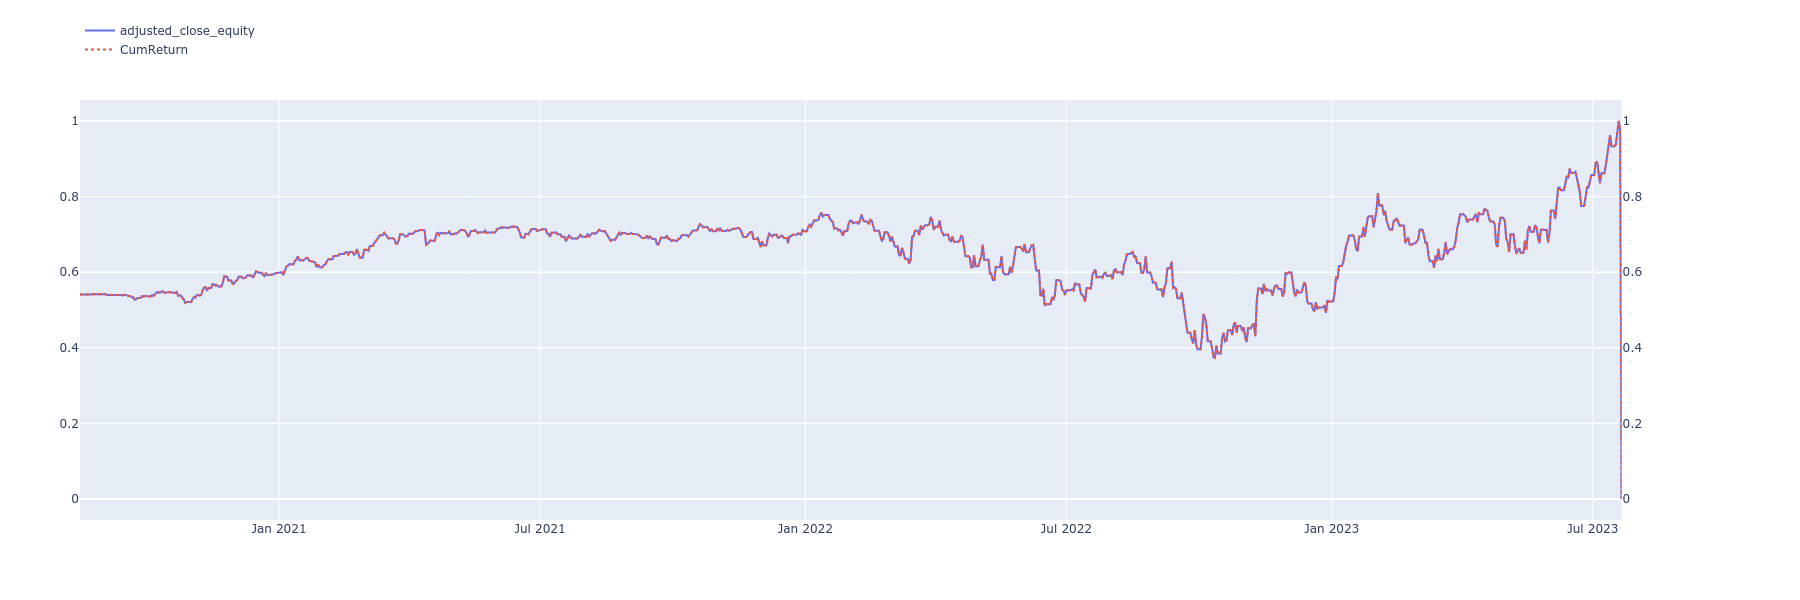

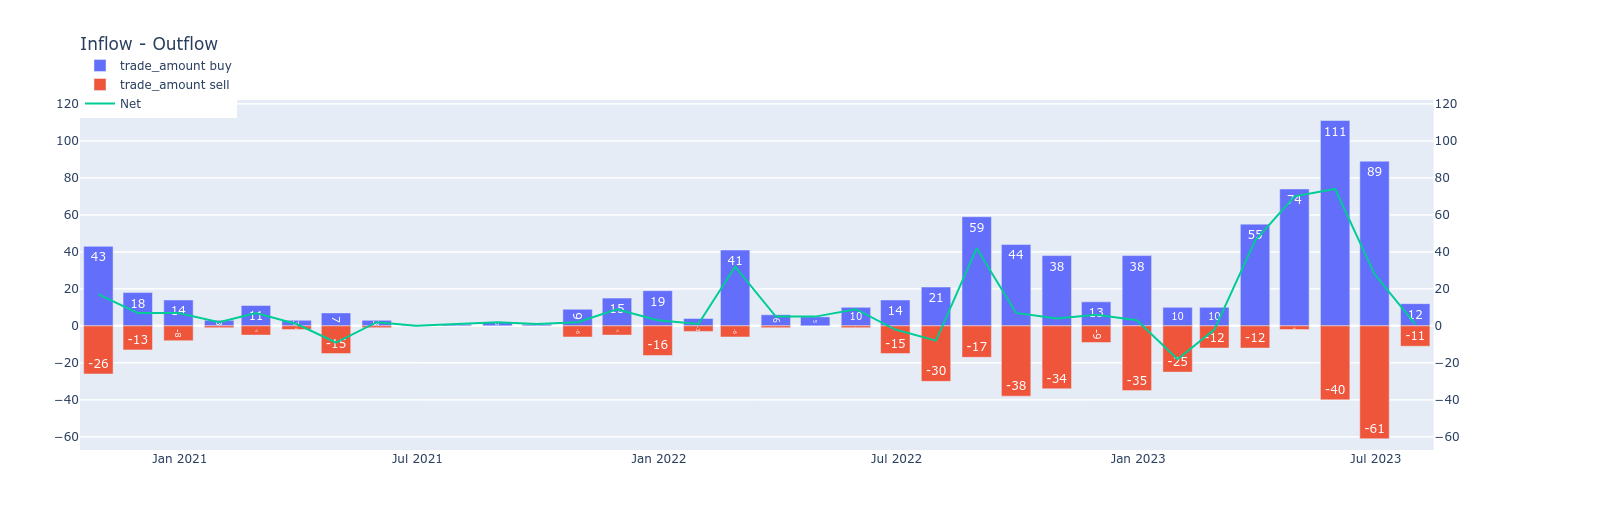

Sector | Holding Summary


sector   ROA   ROE  percentage   equity  equity_initial  \
0                      All  8.28 25.16      100.00 2,000.55        1,752.00   
1       Financial Services  8.50 38.93       21.10   420.10          373.68   
2              Industrials  9.68 13.82       20.86   410.01          377.18   
3        Consumer Cyclical  7.72 17.42       17.30   332.01          280.03   
4               Technology  7.22 14.62       11.86   249.39          198.73   
5            Miscellaneous  7.63 27.53        7.90   160.67          144.47   
6   Communication Services  5.63 21.75        5.76   114.60          108.89   
7                   Energy  5.97 75.70        4.66    98.38           78.16   
8       Consumer Defensive 13.58  9.36        3.92    81.89           71.74   
9              Real Estate 12.73 13.44        4.27    77.48           72.09   
10         Basic Materials  6.57 11.27        1.93    44.58           38.17   
11              Healthcare  5.84 45.60        0.44    11.45            8.85   

    equity_change  percent_change  ev_ebit  firm_to_ebit     pe   fpe    pb  \
0        8,129.80            6.02     5.32          9.42  15.69   inf 23.52   
1        1,638.69            5.00     6.39          8.74  10.53 11.18 24.85   
2        1,429.24            0.48     2.19          6.54  14.86 10.11 26.93   
3        1,129.13           10.28   -15.01        -13.21  12.83   inf 18.78   
4        1,351.41           17.44     5.01          7.59  13.94 12.54 25.47   
5          685.08            2.18     4.66          7.17   9.86 13.26 17.99   
6          411.26           -3.69    -0.12         11.71   9.17  8.24 28.03   
7          540.91           18.79     5.41         12.18   7.98  9.69 15.89   
8          400.49            6.58     8.93         16.15  47.11 10.21 14.35   
9          137.53           -1.59    39.51         44.72 114.63 23.40 18.94   
10         301.61            4.80    -5.03          3.68   7.71 14.20 39.83   
11         104.46           25.86   226.03        228.94  10.78  9.54 33.80   

    pb_ratio    ev  marketCap   rev      ebit  netIncome    netDebt  \
0       2.08 36.74       2.19  4.41  3,516.40   2,294.77  -5,287.52   
1       2.54 35.37       1.28  3.42  1,838.46     256.16   6,614.31   
2       1.45 37.25       1.93  4.31  4,552.17   3,799.26 -18,792.29   
3       2.61 37.52       5.61  3.66  5,370.11   4,054.15  -2,955.73   
4       2.01 35.63       1.47  2.34  3,338.80   2,367.51  -3,902.23   
5       1.62 35.41       0.15  1.47    633.98     401.41     912.59   
6       1.21 33.99       0.78  5.43  2,902.79   2,099.37 -62,551.13   
7       2.19 42.59       0.54  2.99  1,218.66   1,216.23   2,764.90   
8       3.34 36.16       1.96  8.90 10,819.59   5,893.23   6,877.29   
9       3.93 44.34      17.41 33.43  4,492.91   1,466.11  37,902.15   
10      0.96 35.70       1.06  6.22  2,248.70     465.30   6,748.31   
11      1.44 35.50       0.25  0.12     37.80     527.63   1,833.77   

    grossMargins  operatingMargins  profitMargins  totalCash  totalDebt  \
0          35.68             17.48          11.89  28,018.80  22,731.28   
1          29.85             13.08           9.03   1,039.21   7,653.52   
2          36.27             16.35           9.91  58,279.82  39,487.53   
3          40.94             18.34           3.17   9,853.98   6,898.25   
4          41.82             22.50          14.58  22,796.18  18,893.95   
5          37.13             15.51          11.78     465.23   1,377.82   
6          32.28             21.37          14.37 135,874.45  73,323.33   
7          21.33             16.78          24.89   4,566.57   7,331.47   
8          35.02             27.08          13.35  56,306.74  63,184.04   
9          28.99              6.71           4.77  21,642.21  59,544.36   
10         50.07             23.30          18.93   7,409.36  14,157.67   
11         53.83              7.98          56.70     108.68   1,942.45   

    currentRatio  quickRatio  grossProfits    ebitda       ocf  

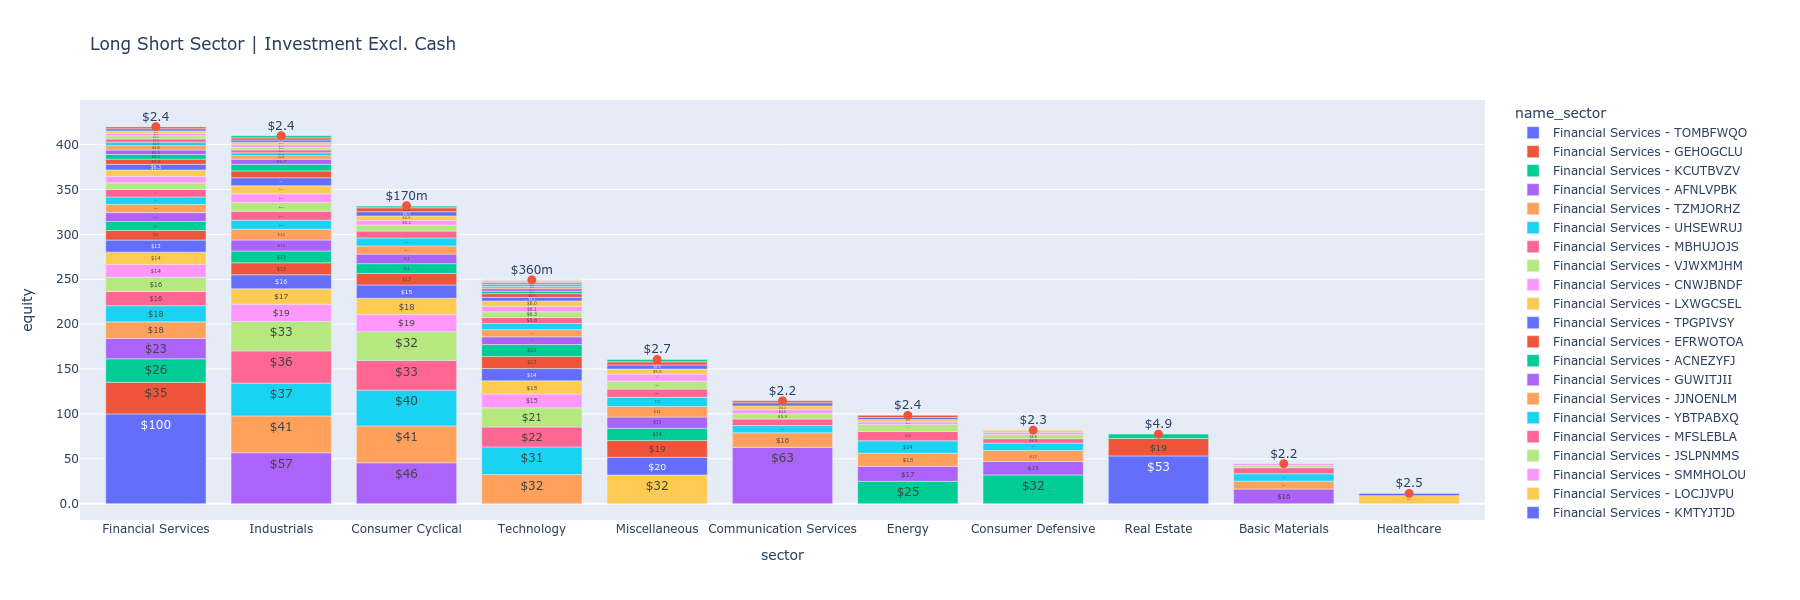

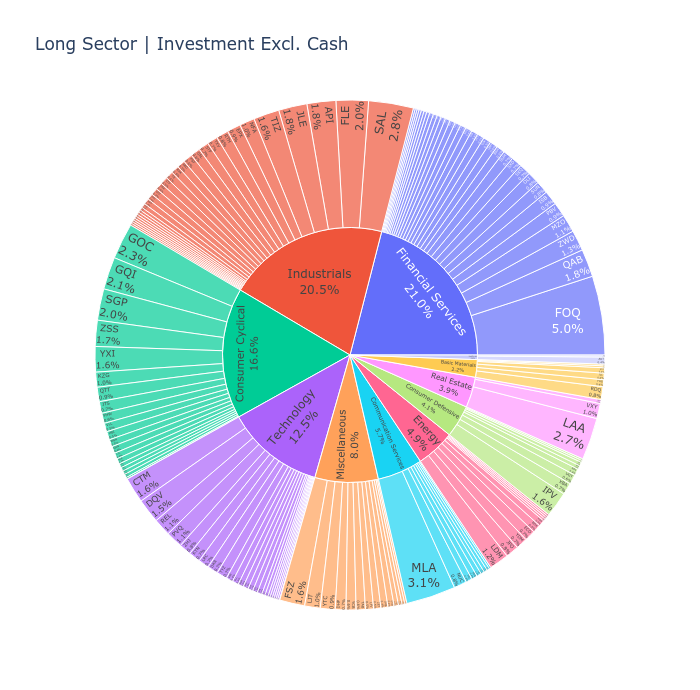

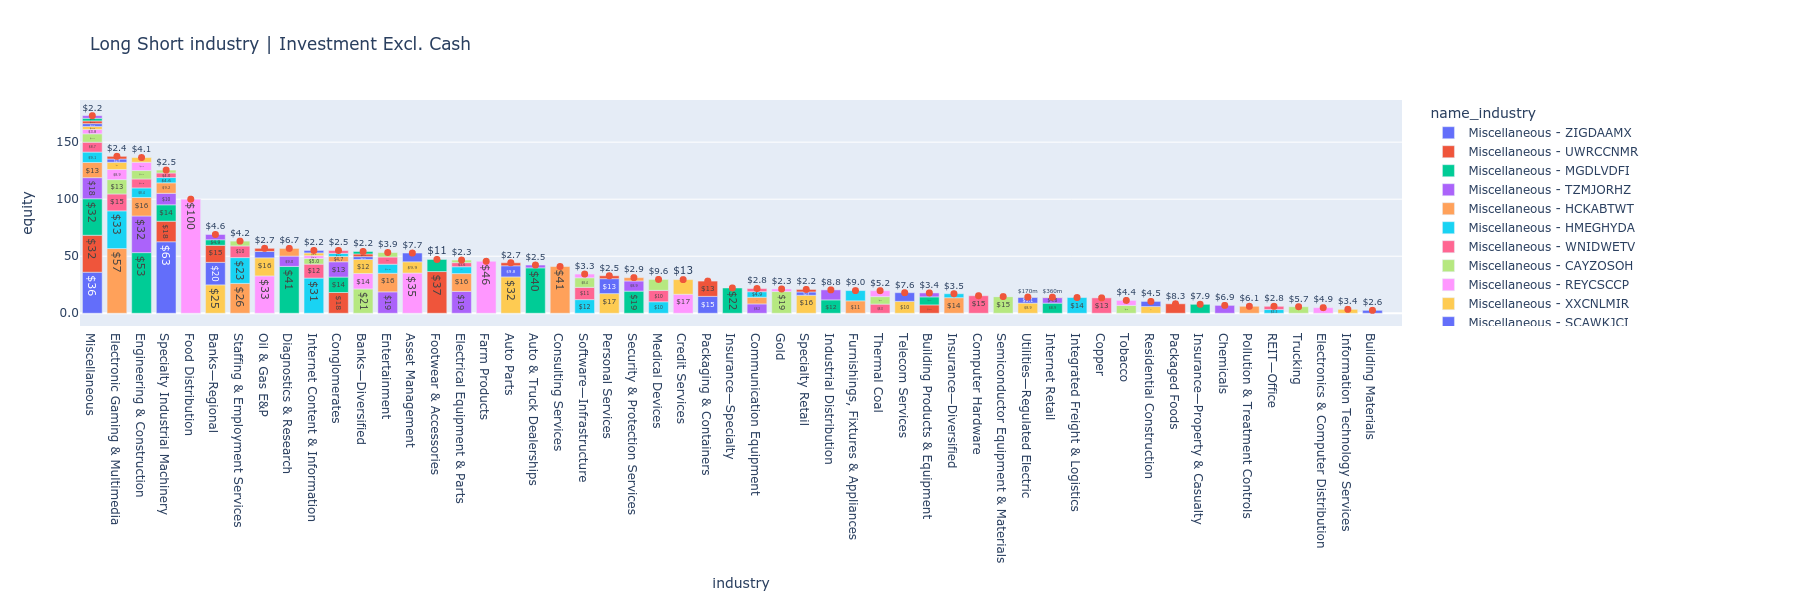

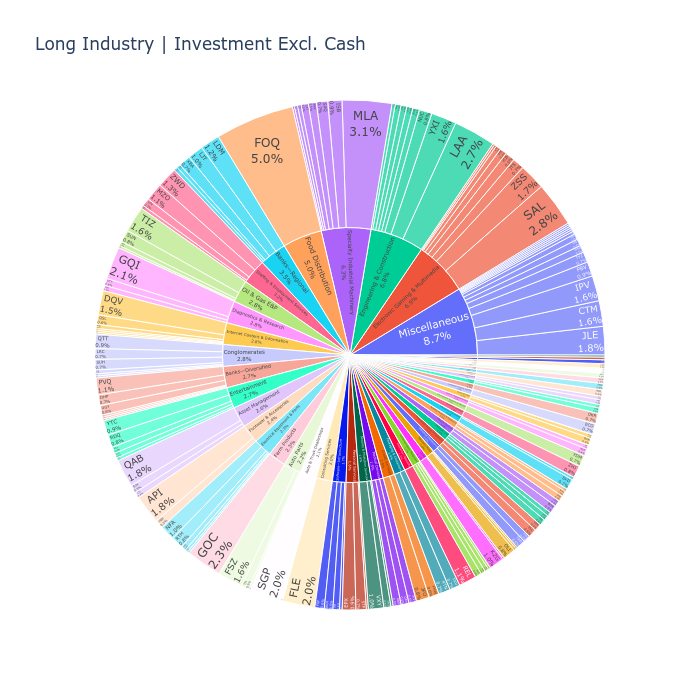

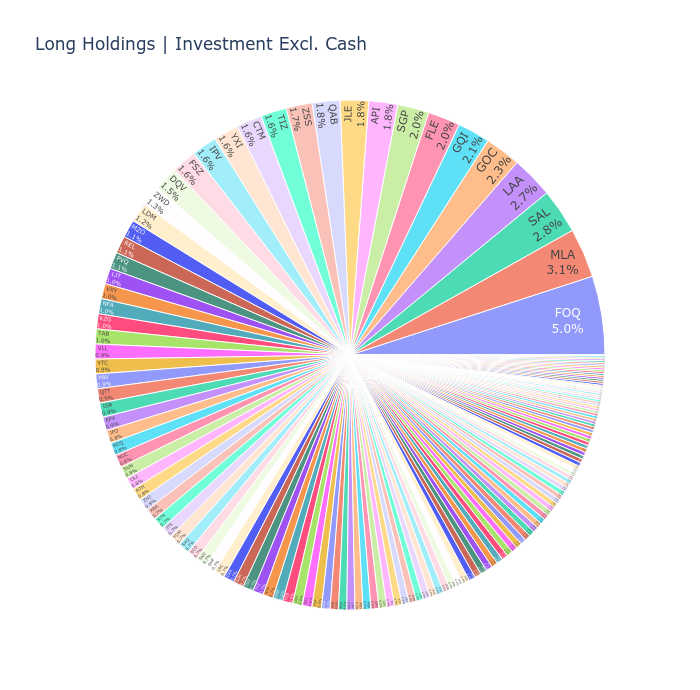

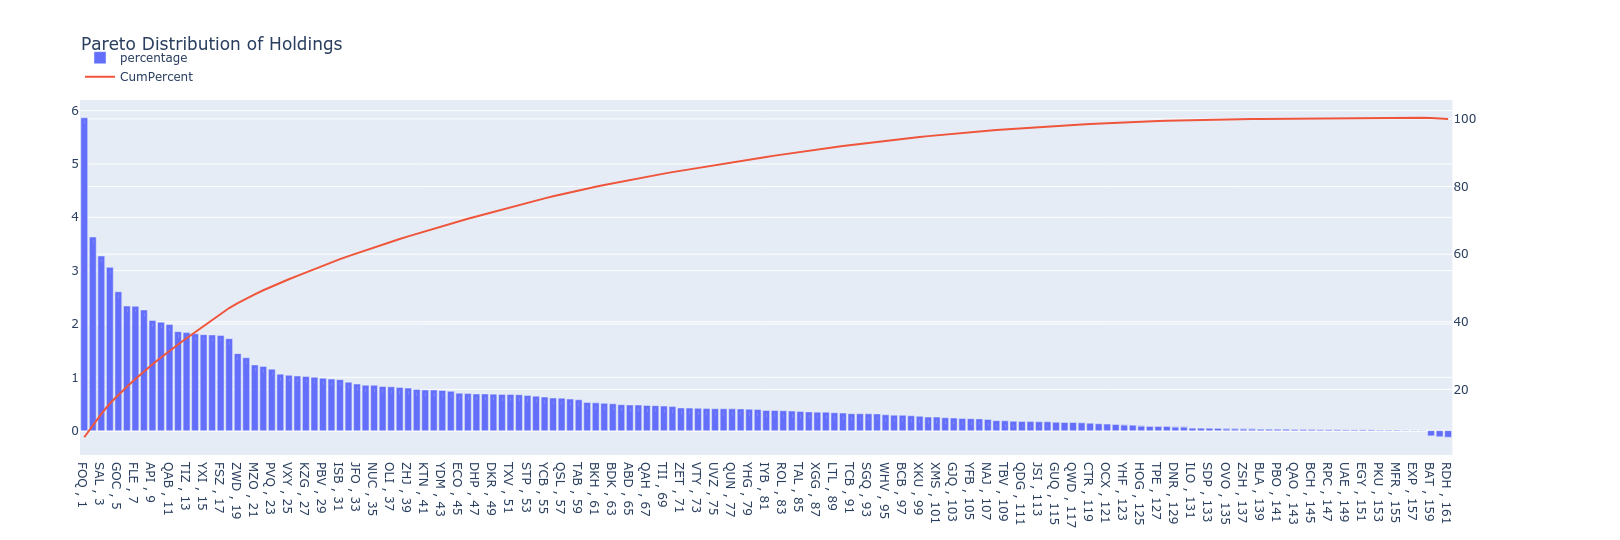

Open Orders


symbol      name side   type  current_price  price  quantity  amount  \
0    AYN  IWAZTAYM  buy  limit          11.27  10.82     17.65   14.55   
1    QLH  VQRERCLT  buy  limit           2.96   4.12     17.65    0.00   
2    QOQ  FBTPLRPD  buy  limit           2.96   3.09     52.94   44.78   
3    EBU  DACKZDWA  buy  limit           2.96   2.06    100.00  100.00   
4    PLE  UYVNWQXJ  buy  limit           0.00   0.00    100.00   85.07   
5    UGN  FBFHZNVG  buy  limit         100.00 100.00      0.00   79.48   
6    AIK  ZWFHHYYQ  buy  limit           0.00   1.03     41.18   21.64   

   quantity_current_holding  ave_price_current_holding  \
0                      2.18                      17.66   
1                      0.00                       4.71   
2                      0.00                       4.71   
3                      0.00                       4.71   
4                    100.00                       0.00   
5                     12.73                     100.00   
6                    100.00                       0.00   

   equity_current_holding      state                   created_at     broker  \
0                    3.71  confirmed  2023-05-01T05:03:00.421460Z  robinhood   
1                    0.00  confirmed  2023-04-28T22:13:46.967891Z  robinhood   
2                    0.00  confirmed  2023-04-28T22:13:18.483226Z  robinhood   
3                    0.00  confirmed  2023-04-28T22:12:36.794312Z  robinhood   
4                  100.00  confirmed  2023-04-28T13:46:07.566705Z  robinhood   
5                   68.46  confirmed  2023-04-26T15:08:03.302114Z  robinhood   
6                  100.00  confirmed  2023-04-25T17:06:47.153957Z  robinhood   

  average_price_current_holding  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN  
5                           NaN  
6                           NaN

In [69]:
### I annomized my portfolio data, that's why it may seem weird
portfolio_analytics(dict_my_portfolio,dict_trade_histroy,height=600,width=1800)

### How to get CSV from IBKR

1. #### Head to Portfolio Analyst--> Report --> Custom Report add the fields shown in the pciture below
1. #### run the report and save result as CSV
1. #### place the CVS where you run the portfolio_analytics.ipynb

<img src="blob:chrome-untrusted://media-app/25472498-8adf-4087-9b42-d060c93d1f76" alt= ""/>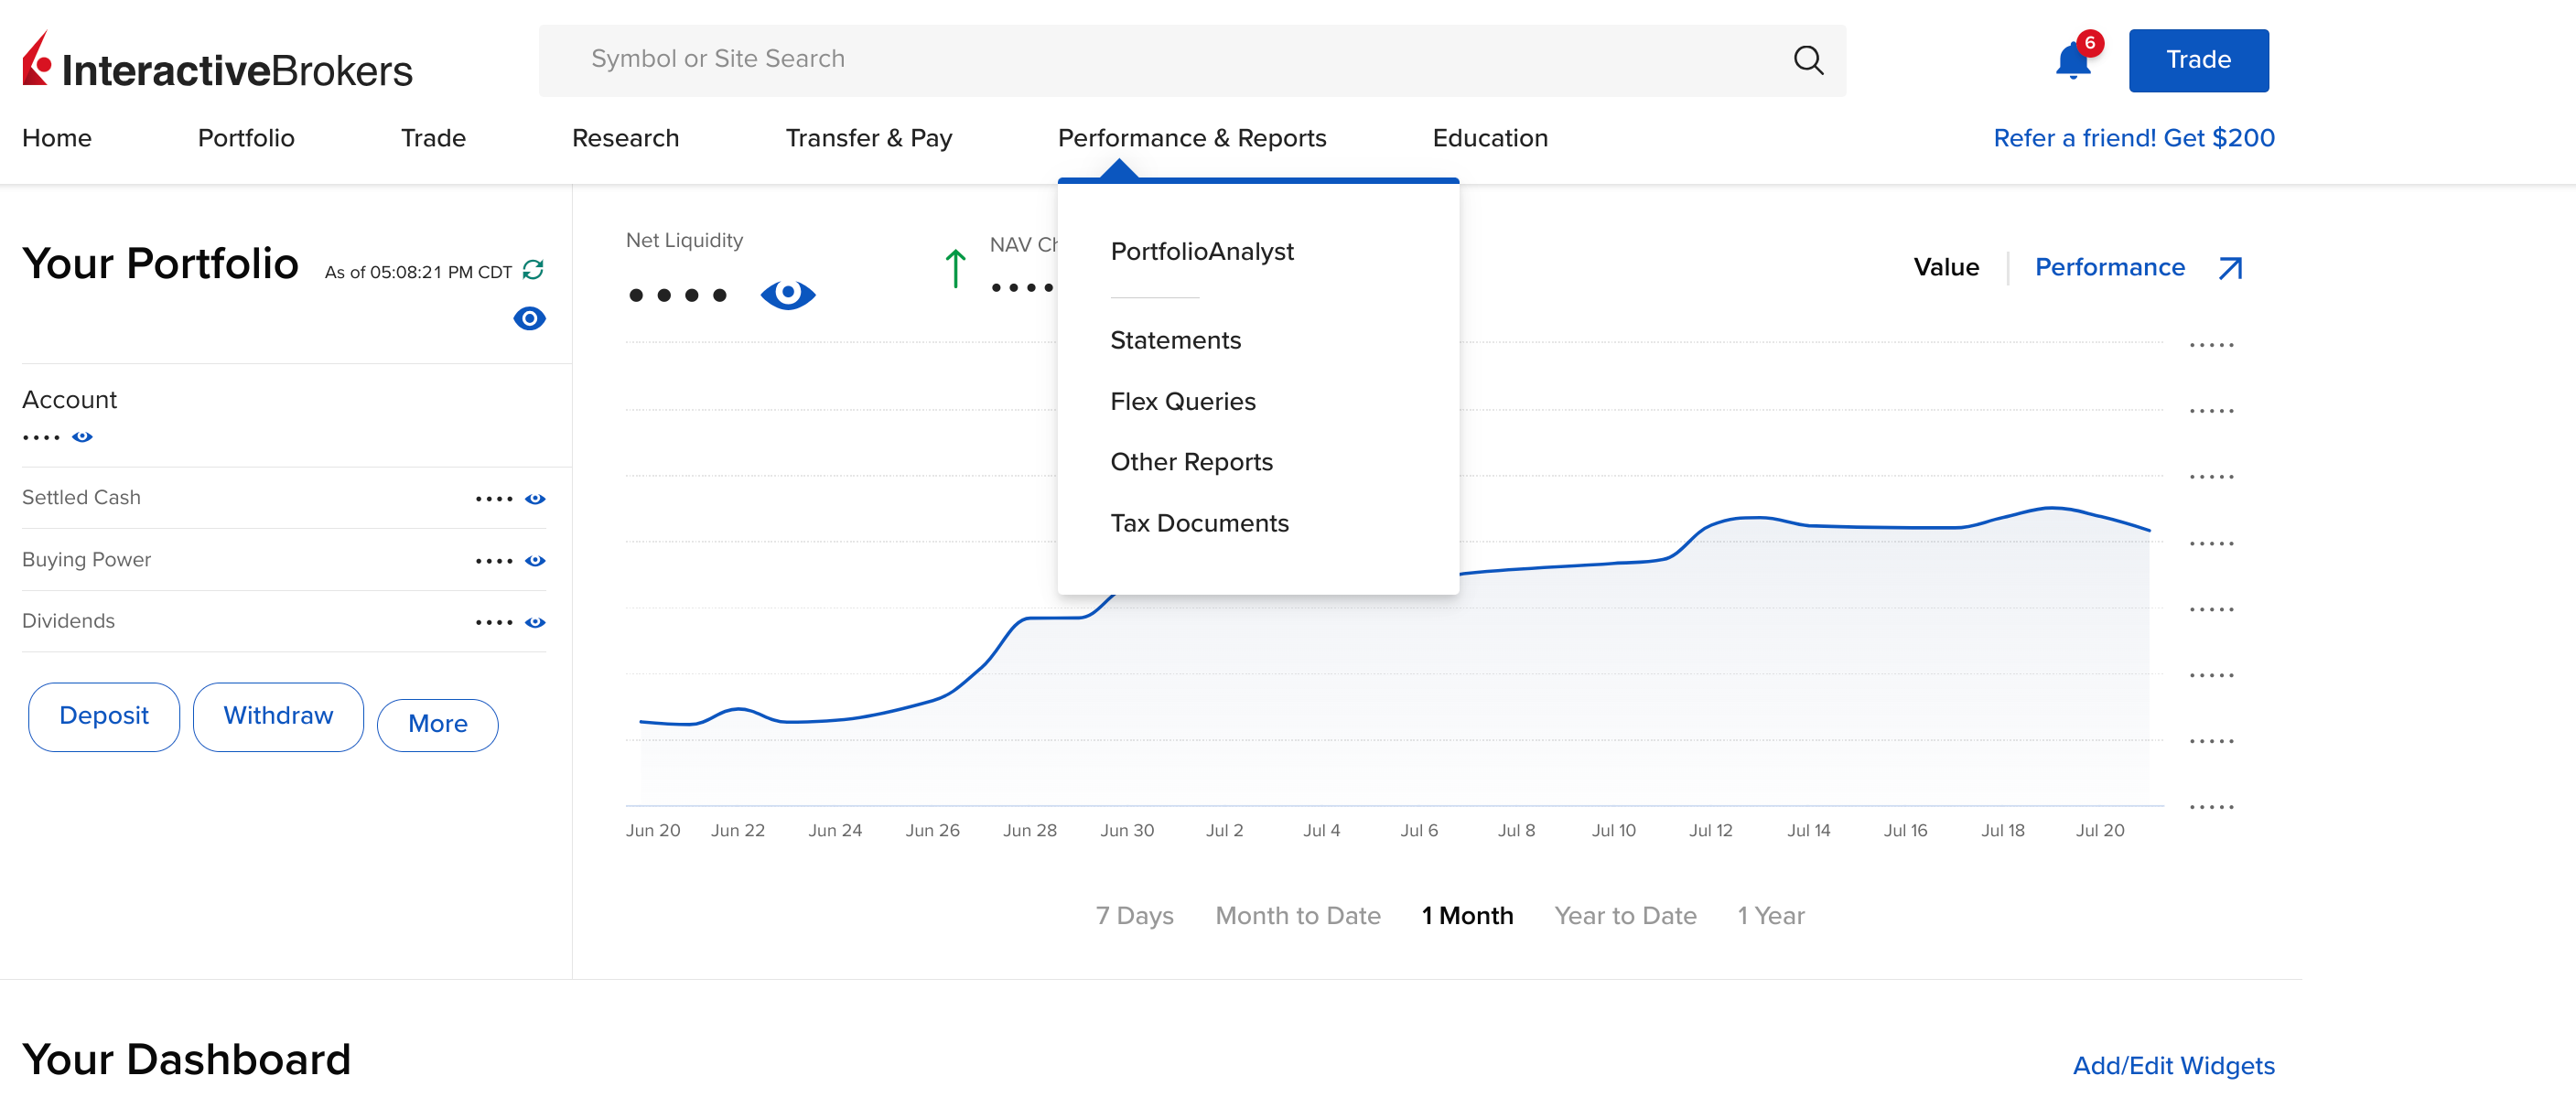

<img src="blob:chrome-untrusted://media-app/60740514-952b-41f4-9fc7-5632feefd3ed" alt=""/>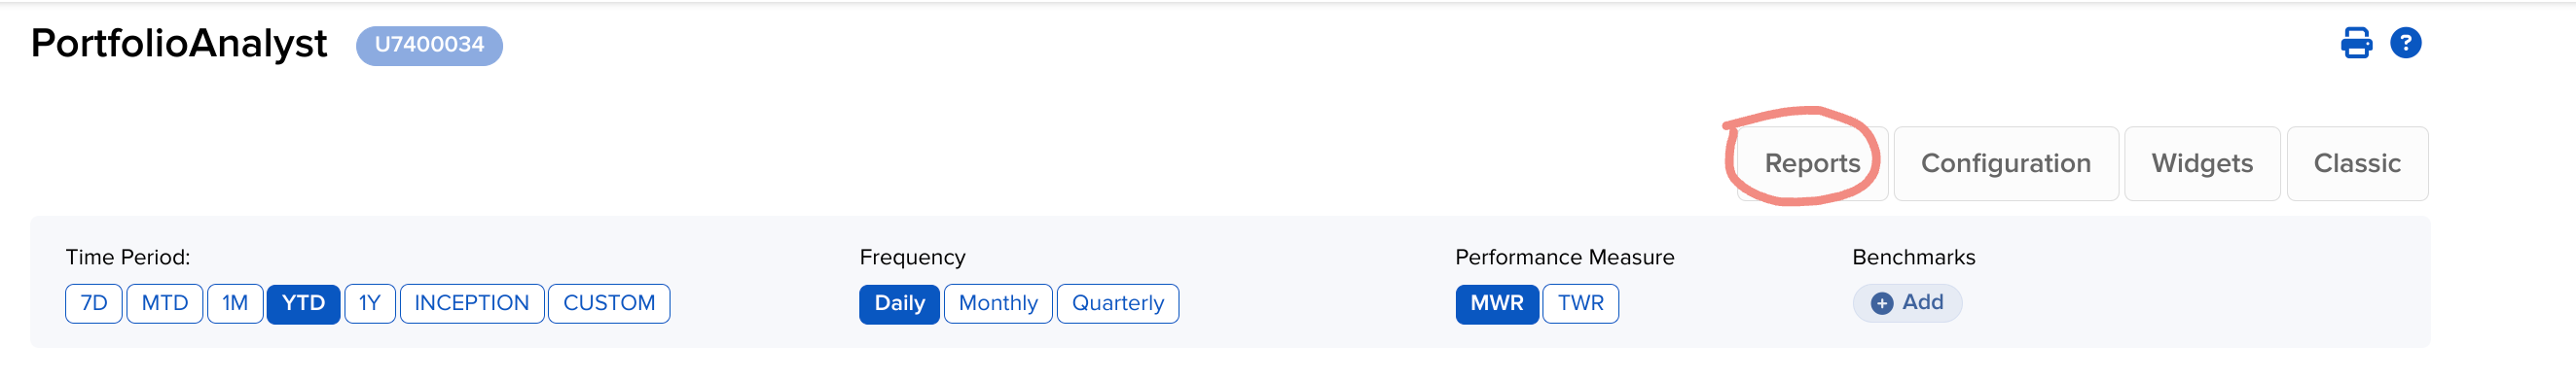

<img src="blob:chrome-untrusted://media-app/4edd04a8-43a3-4f9f-9142-dfd87f0532f8" alt=""/>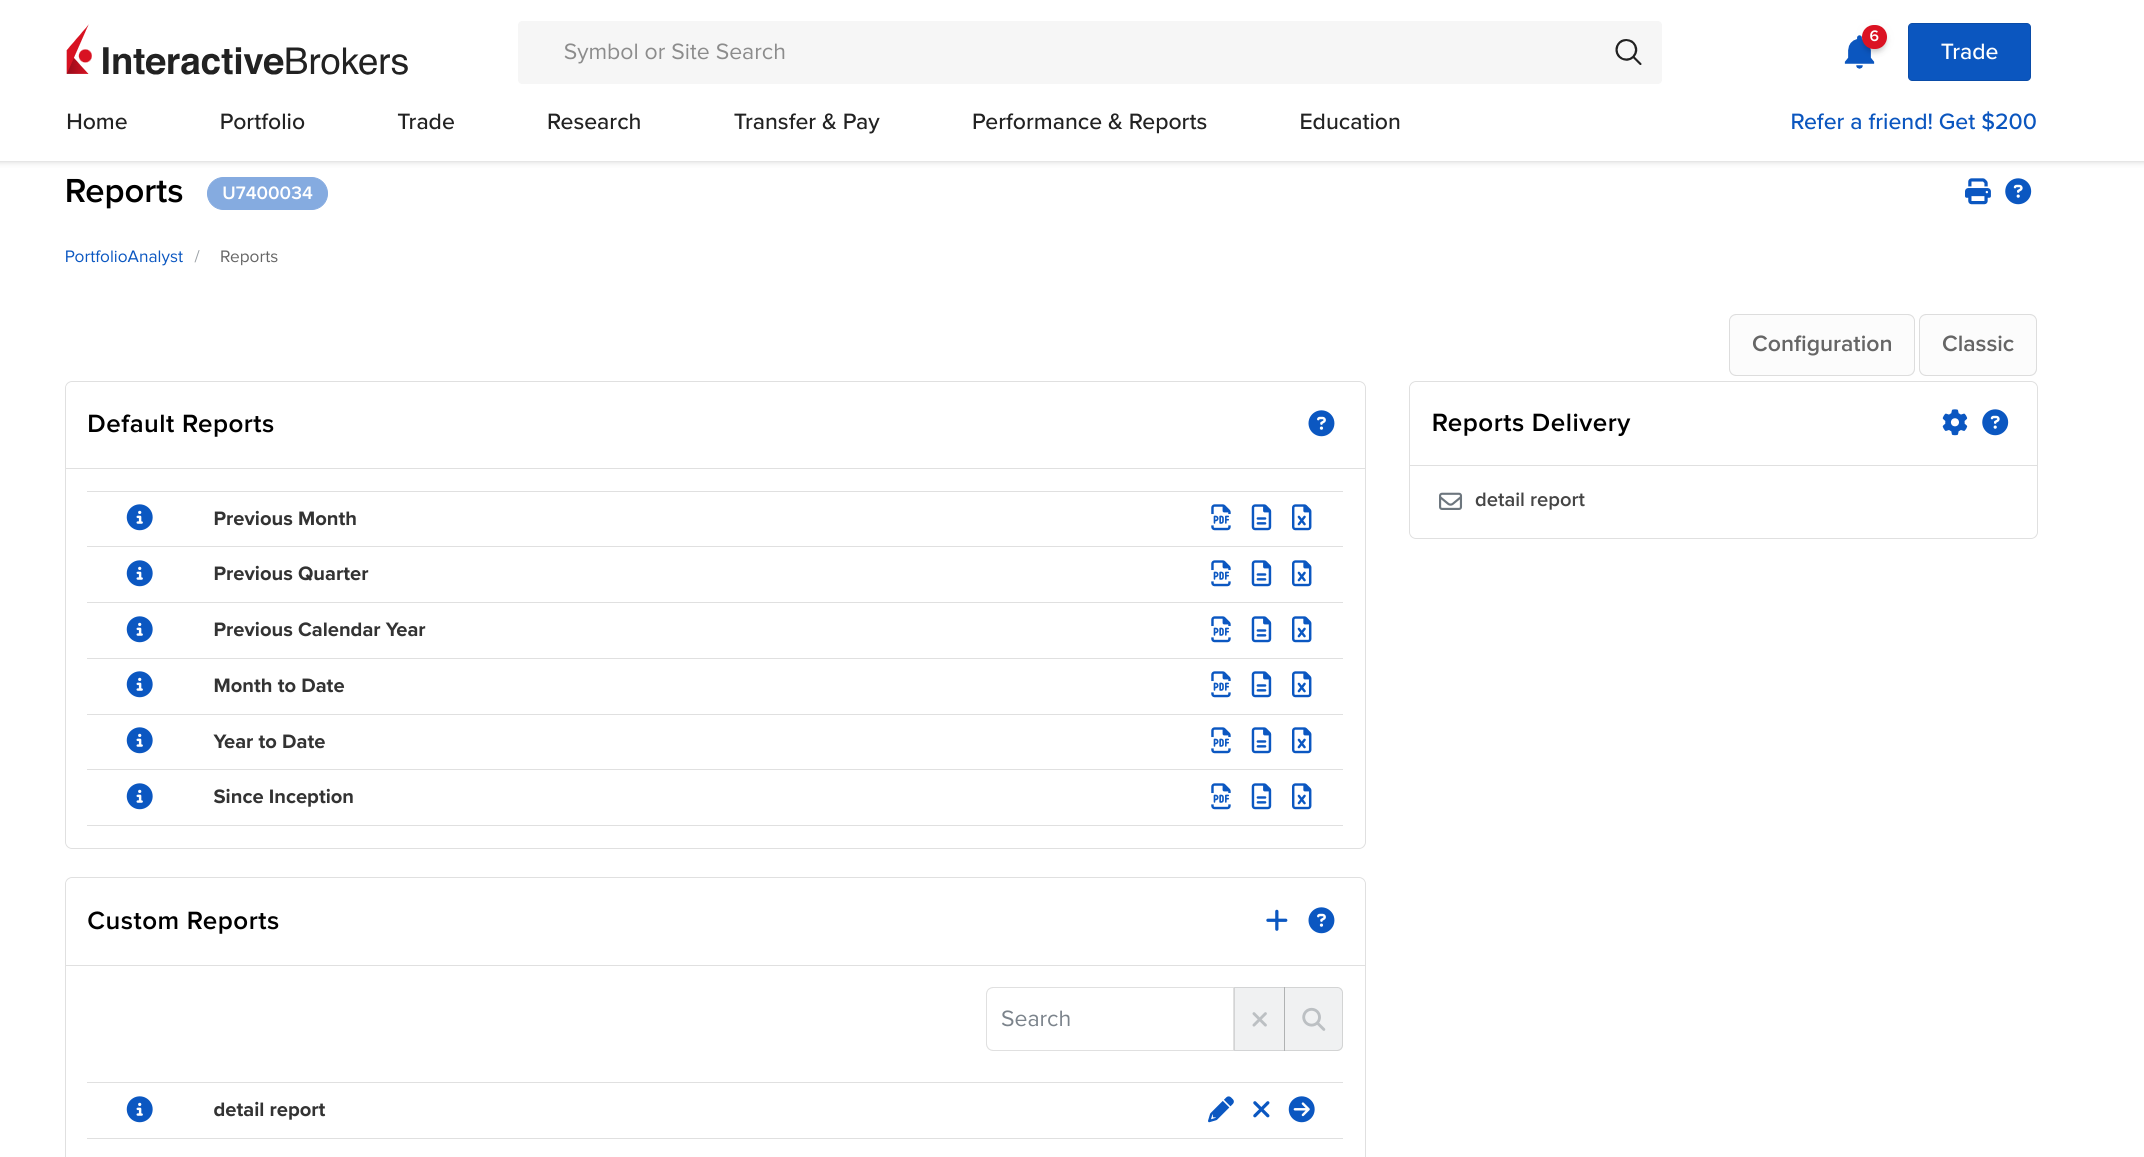

<img src="blob:chrome-untrusted://media-app/9100a512-41c5-49d0-be42-b53d1f0755b7" alt=""/>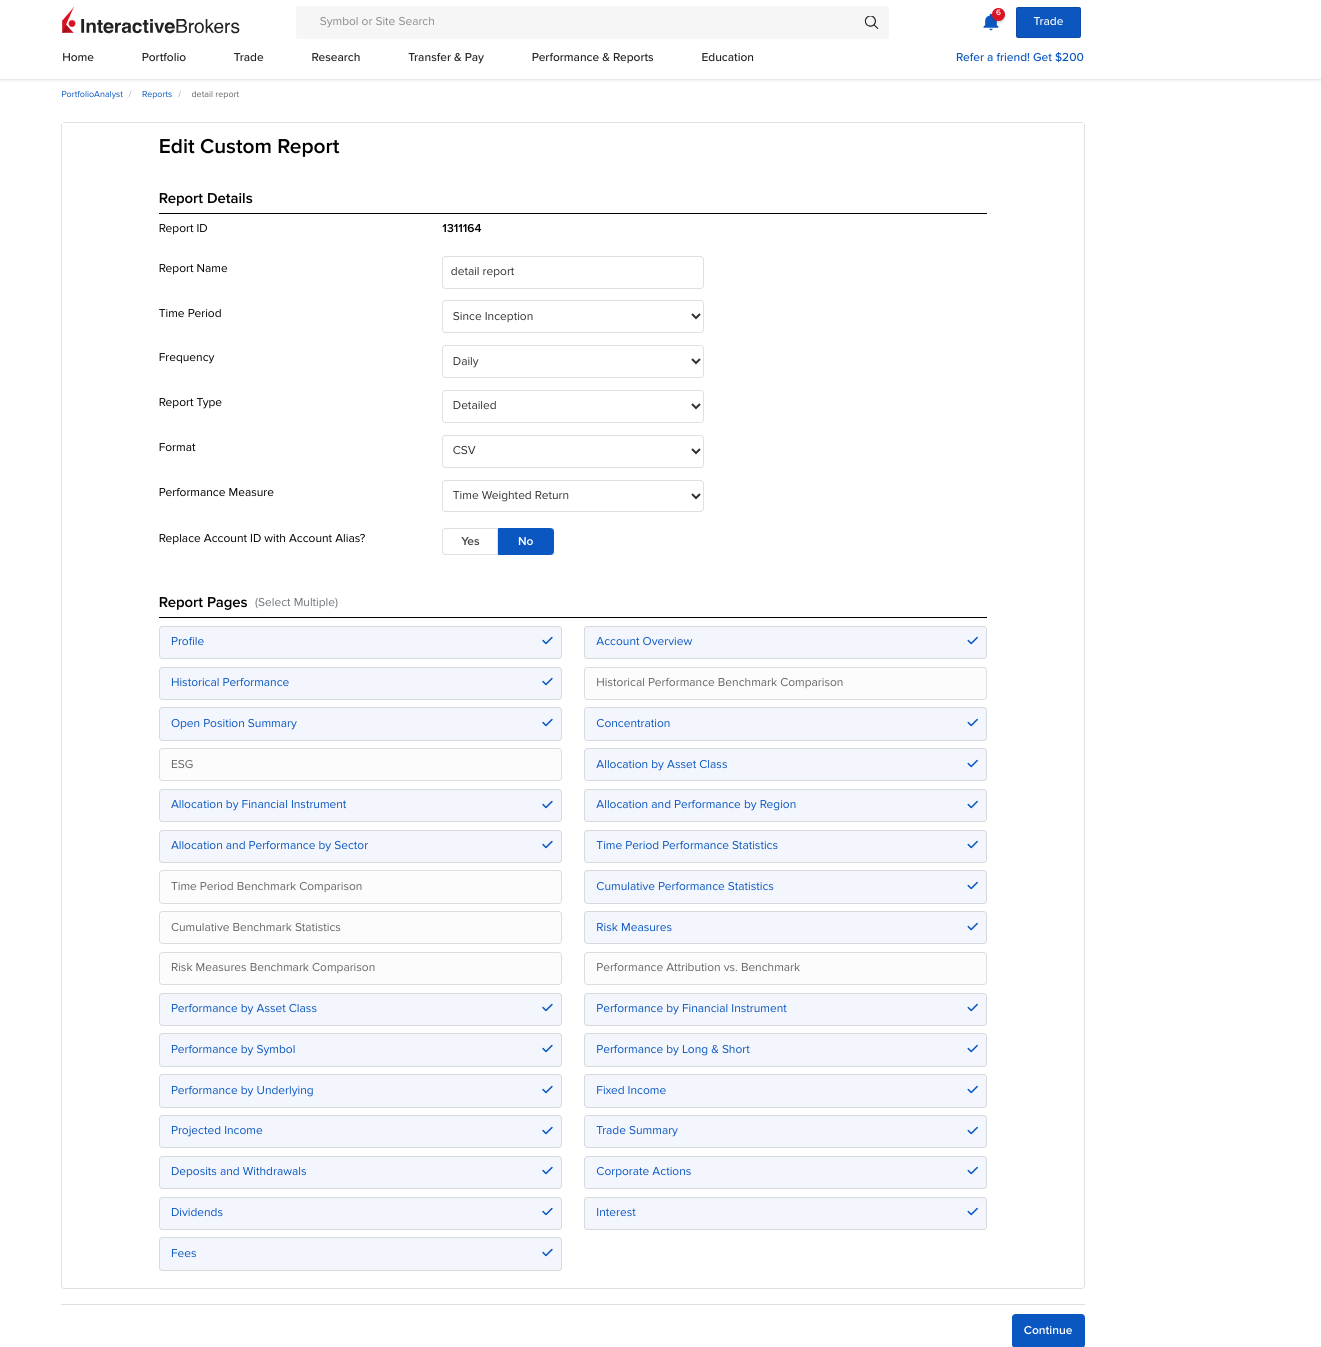